In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Twitter App access keys for @user
#my app access keys

# Consume:
CONSUMER_KEY    = 'EBLPW1pro22bimqjDFHrn4Opp'
CONSUMER_SECRET = 'XrwYX4mQULOSaDBvuWOYYVtLZzkHJU44ORwWq0ZRF32Aw565AH'

# Access:
ACCESS_TOKEN  = '921917165950906368-znfwcJjJCRgN9WZ4HFuAhqmnRLz9J0l'
ACCESS_SECRET = 'bS6XK9NgLFwr8SD3hiUu5vVc1YpVKq4HSjscdtJvWu4ud'


In [4]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


In [5]:
#Using a txt file to store the MP's names 
#read txt file into string lists and looping for next steps
with open('set_crawler.txt', 'r') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
print(content[0])

bennison_andrew


In [6]:
print(len(content))

1


In [7]:
# We create an extractor object:
extractor = twitter_setup()

for strs in content:
# We create a tweet list as follows:
    tweets = extractor.user_timeline(screen_name=strs, count=2000)
    print("Number of tweets extracted: {}.\n".format(len(tweets)))

# print the most recent 5 tweets:
#for test
#print("5 recent tweets:\n")
#for tweet in tweets[:5]:
#    print(tweet.text)
#    print()


# We create a pandas dataframe as follows:
    data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
#display(data.head(10))

# We add relevant data:
    data['len']  = np.array([len(tweet.text) for tweet in tweets])
    data['ID']   = np.array([tweet.id for tweet in tweets])
    data['Date'] = np.array([tweet.created_at for tweet in tweets])
    data['Source'] = np.array([tweet.source for tweet in tweets])
    data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
    data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])







#write this dataframe into csv 

    data.to_csv('%s_likes_rts.csv' % strs, sep=',', encoding='utf-8')

#due to the twitter content is not determined, the data form needs extre cleaning steps

Number of tweets extracted: 52.



In [8]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [12]:
# We print info from the first tweet:

print(tweets[2].id)
print(tweets[2].created_at)
print(tweets[2].source)
print(tweets[2].favorite_count)
print(tweets[2].retweet_count)

print(tweets[0].geo)
print(tweets[0].coordinates)
#print(tweets[0].entities)

print(tweets[0].in_reply_to_screen_name)
print(tweets[0].in_reply_to_user_id)
print(tweets[0].in_reply_to_user_id_str)
#print(tweets[0].place)
print(tweets[0].retweet)
print(tweets[0].retweeted)
print(tweets[0].retweets)


995253599021289473
2018-05-12 10:45:23
Twitter for iPhone
0
0
None
None
LeanneWood
14450739
14450739
<bound method Status.retweet of Status(_api=<tweepy.api.API object at 0x1a0e5dd7f0>, _json={'created_at': 'Sat Jul 07 08:43:21 +0000 2018', 'id': 1015516607857287168, 'id_str': '1015516607857287168', 'text': '@LeanneWood @Plaid_Cymru Happy to support in any way I can..', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'LeanneWood', 'name': 'LeanneWood 🏴\U000e0067\U000e0062\U000e0077\U000e006c\U000e0073\U000e007f', 'id': 14450739, 'id_str': '14450739', 'indices': [0, 11]}, {'screen_name': 'Plaid_Cymru', 'name': 'Plaid Cymru', 'id': 14411725, 'id_str': '14411725', 'indices': [12, 24]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1015277528020332544, 'in_reply_to_status_id_str': '1015277528020332544', 'in_reply_to_user_id': 14450739, 'in_reply_to_user

In [45]:
# We add relevant data:
#data['len']  = np.array([len(tweet.text) for tweet in tweets])
#data['ID']   = np.array([tweet.id for tweet in tweets])
#data['Date'] = np.array([tweet.created_at for tweet in tweets])
#data['Source'] = np.array([tweet.source for tweet in tweets])
#data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
#data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


In [46]:
# Display of first 10 elements from dataframe:
#display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs
0,Pretty damning assessment.\n\nNorman Baker: I ...,136,1017443135004266496,2018-07-12 16:18:41,Twitter for Android,0,0
1,RT @chrisinsilico: Cambridge Analytica and Ste...,140,1017322678729035776,2018-07-12 08:20:02,Twitter for Android,0,3611
2,"RT @DotLepkowska: Donald Tusk, as a student, w...",140,1017321530160762880,2018-07-12 08:15:28,Twitter for Android,0,697
3,RT @jo_penberthy: Never thought I as an anti a...,140,1017318001983582208,2018-07-12 08:01:27,Twitter for Android,0,222
4,RT @slowbikeiain: That's fine phil - but it do...,140,1017317335282212864,2018-07-12 07:58:48,Twitter for Android,0,6
5,RT @pswidlicki: Kate is textbook example of ho...,139,1017316925997764608,2018-07-12 07:57:10,Twitter for Android,0,819
6,RT @Andrew_Adonis: I don’t mind the Blitz spir...,140,1017316745491763200,2018-07-12 07:56:27,Twitter for Android,0,371
7,"RT @Tommoriarty16: Essentially Ms Patel, in so...",140,1017316636850839557,2018-07-12 07:56:01,Twitter for Android,0,181
8,RT @garvanwalshe: 13. In any case presenting Y...,140,1017314685299851264,2018-07-12 07:48:16,Twitter for Android,0,6
9,RT @BrexitBin: Your daily reminder that if we ...,140,1017171927817957381,2018-07-11 22:21:00,Twitter for Android,0,739


In [57]:
#write this dataframe into csv 

#data.to_csv('%s_likes_rts.csv' % content[n], sep=',', encoding='utf-8')

#due to the twitter content is not determined, the data form needs extre cleaning steps

In [125]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 127.705


In [134]:
# We extract the mean of likes:
mean = np.mean(data['Likes'])

print("The Likes' average in tweets: {}".format(mean))

The Likes' average in tweets: 3.6


In [126]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
Had a bit of time off twitter while I did a life thing 👰 🤗

Still grinning about the day &amp; thanks to all the fab Co… https://t.co/1lxdbiY3mK
Number of likes: 102
144 characters.

The tweet with more retweets is: 
RT @KensingtonRoyal: The Duke and Duchess of Cambridge are delighted to announce that they have named their son Louis Arthur Charles.
 
The…
Number of retweets: 36590
140 characters.



In [127]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])


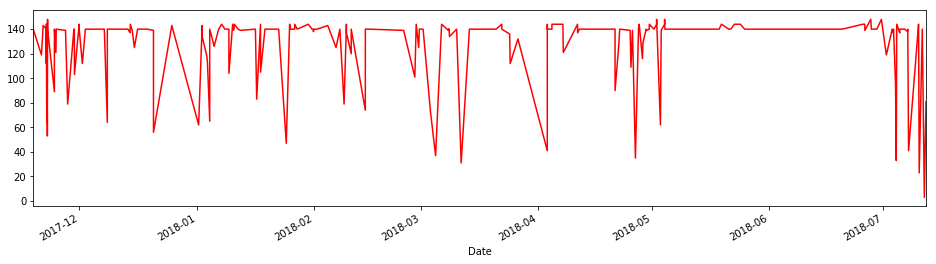

In [128]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');


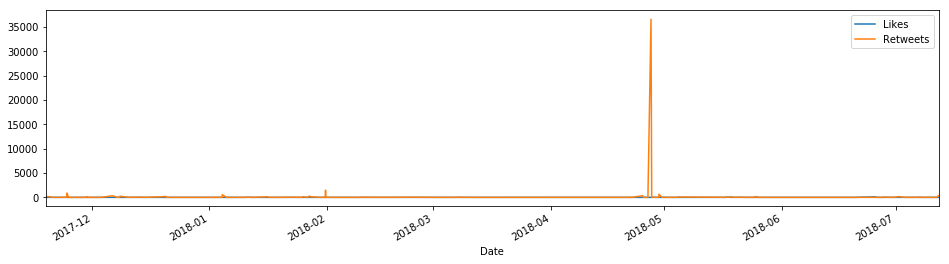

In [129]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


In [130]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [131]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @England: Wise words from the gaffer. 👏\n\n...,81,1017311645230620672,2018-07-12 07:36:11,Twitter for iPhone,0,361,1
1,🙁 x,3,1017153354928214016,2018-07-11 21:07:12,Twitter for iPhone,1,0,0
2,RT @VirginiaCrosbie: ‘Looking forward to seein...,140,1016958897507225600,2018-07-11 08:14:30,Twitter for iPhone,0,7,1
3,https://t.co/dPqBkvcXWb,23,1016662082182410240,2018-07-10 12:35:03,Twitter for iPhone,1,0,0
4,I have a very close family member in the RAF. ...,141,1016603791217524736,2018-07-10 08:43:26,Twitter for iPhone,9,2,1
5,Pleased to see @JustinTomlinson @DWP There is ...,144,1016599484439191553,2018-07-10 08:26:19,Twitter for iPhone,1,1,1
6,Lovely stuff ⚽️🤗x https://t.co/I20NwORkW1,41,1015646011879018496,2018-07-07 17:17:33,Twitter for iPhone,8,0,1
7,"RT @Telegraph: To some, a LGBTQ conservative i...",140,1015568172873809920,2018-07-07 12:08:15,Twitter for iPhone,0,64,0
8,RT @aliciakearns: Taking a moment today to rem...,138,1015542334220652545,2018-07-07 10:25:34,Twitter for iPhone,0,53,-1
9,Before you go to watch the football tomorrow.....,140,1015279507278893062,2018-07-06 17:01:12,Twitter for iPhone,0,0,1


In [132]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [133]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 66.0%
Percentage of neutral tweets: 23.5%
Percentage de negative tweets: 10.5%
